This is from here: https://gist.github.com/gurvindersingh/d008a7a42565145dd0904d145c70f6db

In [1]:
import mlflow

In [2]:
from fastai import *
from fastai.vision import *

### Start MLFlow Tracking client

In [4]:
mlfclient = mlflow.tracking.MlflowClient(tracking_uri="http://localhost:5000")


In [5]:
mlfexp = mlfclient.create_experiment("jj-test2")


In [6]:
run34 = mlfclient.create_run(experiment_id=mlfexp)


In [7]:
params = {
    'size': 224,
    'epochs': 4,
    'bs': 64
}

In [8]:
# Log our parameters into mlflow
for k,v in params.items():
    mlfclient.log_param(run_id=run34.info.run_uuid, key=k, value=v)

In [9]:
## Tracking Class
from mlflow.tracking import MlflowClient
from mlflow.entities.run import Run

class MLFlowTracking(LearnerCallback):
    "A `LearnerCallback` that tracks the loss and other metrics into MLFlow"
    def __init__(self, learn:Learner, client:MlflowClient, run_id: Run):
        super().__init__(learn)
        self.learn = learn
        self.client = client
        self.run_id = run_id
        self.metrics_names = ['train_loss', 'valid_loss'] + [o.__name__ for o in learn.metrics]

    def on_epoch_end(self, epoch, **kwargs:Any)->None:
        "Send loss and other metrics values to MLFlow after each epoch"
        if kwargs['smooth_loss'] is None or kwargs["last_metrics"] is None:
            return
        metrics = [kwargs['smooth_loss']] + kwargs["last_metrics"]
        for name, val in zip(self.metrics_names, metrics):
            self.client.log_metric(self.run_id, name, np.float(val))

In [10]:
path = untar_data(URLs.PETS); path

WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet')

In [11]:
path.ls()


[WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/crappy'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/image_gen'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/models')]

In [12]:
path_anno = path/'annotations'
path_img = path/'images'

In [13]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/Julius/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [14]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=params['size'], bs=params['bs'])
data.normalize(imagenet_stats);

C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

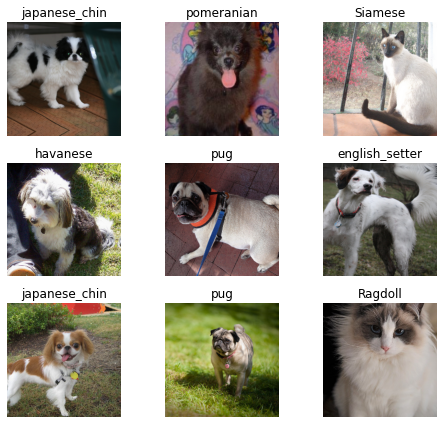

In [16]:
data.show_batch(rows=3, figsize=(7,6))


In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,
                   callback_fns=[partial(MLFlowTracking, client=mlfclient, run_id=run34.info.run_uuid)])

C:\Users\Julius\Documents\GitHub\fastai-pythonic\fastai\vision\learner.py:200: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [18]:
learn.fit_one_cycle(params['epochs'])


epoch,train_loss,valid_loss,error_rate,time
0,1.393691,0.324695,0.107578,02:04
1,0.604991,0.316802,0.100135,01:59
2,0.396814,0.262237,0.085250,01:59
3,0.291759,0.242731,0.080514,01:59


In [19]:
learn.save('stage-1-34')


In [20]:
mlfclient.set_terminated(run_id=run34.info.run_uuid)


In [21]:
params['epochs'] = 5
params['size'] = 299
params['bs'] = 48

In [22]:
run50 = mlfclient.create_run(experiment_id=mlfexp, run_name="resenet50")


TypeError: create_run() got an unexpected keyword argument 'run_name'

In [ ]:
# Log our parameters into mlflow
for k,v in params.items():
    mlfclient.log_param(run_id=run50.info.run_uuid, key=k, value=v)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=params['size'], bs=params['bs'])
data.normalize(imagenet_stats);

In [ ]:

learn = create_cnn(data, models.resnet50, metrics=error_rate,
                   callback_fns=[partial(MLFlowTracking, client=mlfclient, run_id=run50.info.run_uuid)])

In [ ]:
learn.fit_one_cycle(params['epochs'])


In [ ]:
learn.save('stage-1-50')


In [ ]:
mlfclient.set_terminated(run_id=run50.info.run_uuid)
